In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [19]:
data=loadmat("E:/andrew machine learning/andrew_ml_ex78376/ex7data1.mat")

In [20]:
X=data["X"]

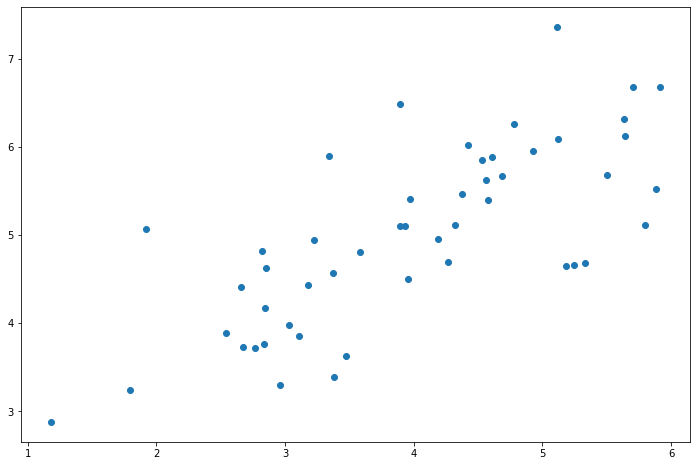

In [21]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(X[:,0],X[:,1])
plt.show()

In [44]:
def pca(X):
    X=(X-X.mean())/X.std() #regularization
    
    X=np.matrix(X)
    cov=(X.T*X)/X.shape[0] #compute covariance matrix
    
    U,S,V=np.linalg.svd(cov) #computer U,S.V
    
    return U,S,V

In [23]:
U,S,V=pca(X)
U,S,V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([1.43584536, 0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [27]:
def project_data(X,U,k):
    U_reduced=U[:,:k]
    return np.dot(X,U_reduced) #np.matrix(X)*U[:,:1]

In [36]:
Z=project_data(X,U,1)
Z[:5]

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579]])

In [30]:
def recover_data(Z,U,k):
    U_reduced=U[:,:k]
    return np.dot(Z,U_reduced.T)

In [37]:
X_recovered=recover_data(Z,U,1)
X_recovered[:5]

matrix([[3.76152442, 2.89550838],
        [5.67283275, 4.36677606],
        [3.80014373, 2.92523637],
        [3.53223661, 2.71900952],
        [3.80569251, 2.92950765]])

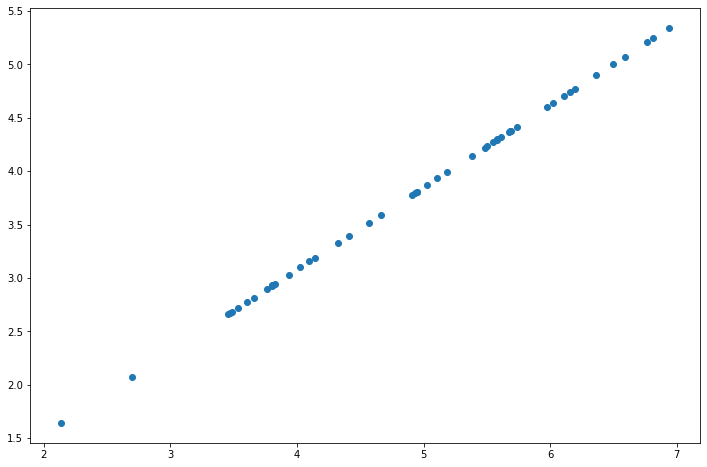

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(list(X_recovered[:, 0]), list(X_recovered[:, 1]))
plt.show()

In [34]:
X.shape,U.shape

((50, 2), (2, 2))

In [38]:
faces=loadmat("E:/andrew machine learning/andrew_ml_ex78376/ex7faces.mat")
X=faces["X"]
X.shape

(5000, 1024)

In [39]:
def plot_n_image(X, n):
    """ plot first n images
    n has to be a square number
    """
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

In [40]:
face = np.reshape(X[3,:], (32, 32))

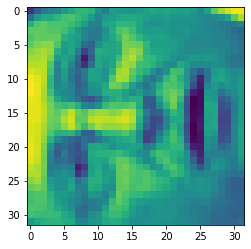

In [41]:
plt.imshow(face)
plt.show()

In [42]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

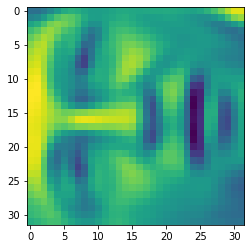

In [43]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)
plt.show()